<a href="https://colab.research.google.com/github/sajad13901/Statistics_Wasserman/blob/main/Wasserman_Chapter_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

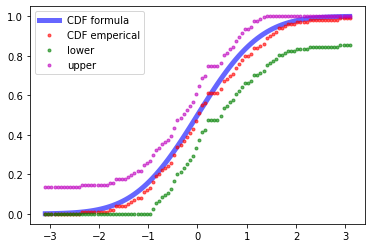

Normal dist. : percentage of times bounds dont contain true F:  0.033


In [ ]:
# Chapter 7, problem 3, Normal distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def ecdf(data, x_vec, alpha):
    data_sort = np.sort(data)
    n = data.size
    eps = (np.log(2/alpha)/n/2) ** .5
    F_hat = []
    F_lower = []
    F_upper = []
    for e in x_vec:
        if e >= data_sort[-1]:
            tmp = 1
        elif e < data_sort[0]:
            tmp = 0
        else:
            idx = np.argwhere(np.array(data_sort) > e)[0][0]
            tmp = idx/n
        
        F_hat.append(tmp)
        F_lower.append(max(tmp-eps, 0))
        F_upper.append(min(tmp+eps, 1))
    return F_hat, F_lower, F_upper

x_vec = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
F_real = norm.cdf(x_vec)

data = np.random.normal(0, 1, 100)
F_hat, F_lower, F_upper = ecdf(data, x_vec, alpha = 0.05)

plt.plot(x_vec, F_real, 'b-', lw=5, alpha=0.6, label='CDF formula')
plt.plot(x_vec, F_hat, 'r.', lw=5, alpha=0.6, label='CDF emperical')
plt.plot(x_vec, F_lower, 'g.', lw=5, alpha=0.6, label='lower')
plt.plot(x_vec, F_upper, 'm.', lw=5, alpha=0.6, label='upper')
plt.legend(loc='best')
plt.show()

cnt = 0
sim_num = 1000
for i in range(sim_num):
    data = np.random.normal(0, 1, 100)
    F_hat, F_lower, F_upper = ecdf(data, x_vec, alpha = 0.05)
    for j in range(F_real.size):
        if (F_real[j] > F_upper[j]) or (F_real[j] < F_lower[j]):
            cnt += 1
            break

print('Normal dist. : percentage of times bounds dont contain true F: ', cnt/sim_num) 


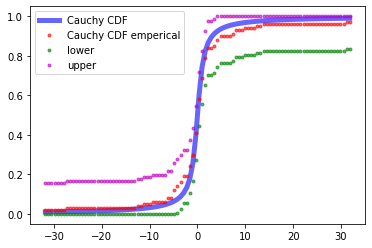

Cauchy dist. : percentage of times bounds dont contain true F:  0.012


In [ ]:
# Chapter 7, problem 3, Cauchy distribution
from scipy.stats import cauchy

x_vec = np.linspace(cauchy.ppf(0.01), cauchy.ppf(0.99), 100)
F_real = cauchy.cdf(x_vec)

data = np.random.standard_cauchy(100)
F_hat, F_lower, F_upper = ecdf(data, x_vec, alpha = 0.05)

plt.plot(x_vec, F_real, 'b-', lw=5, alpha=0.6, label='Cauchy CDF')
plt.plot(x_vec, F_hat, 'r.', lw=5, alpha=0.6, label='Cauchy CDF emperical')
plt.plot(x_vec, F_lower, 'g.', lw=5, alpha=0.6, label='lower')
plt.plot(x_vec, F_upper, 'm.', lw=5, alpha=0.6, label='upper')
plt.legend(loc='best')
plt.show()

cnt = 0
sim_num = 1000
for i in range(sim_num):
    data = np.random.standard_cauchy(100)
    F_hat, F_lower, F_upper = ecdf(data, x_vec, alpha = 0.05)
    for j in range(F_real.size):
        if (F_real[j] > F_upper[j]) or (F_real[j] < F_lower[j]):
            cnt += 1
            break

print('Cauchy dist. : percentage of times bounds dont contain true F: ', cnt/sim_num) 


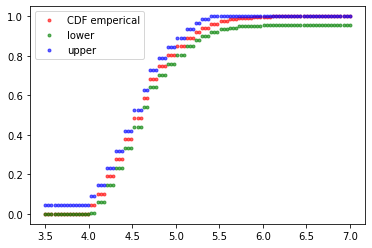

95% interval:  0.495 , 0.557


In [2]:
# Chapter 7, problem 7
from google.colab import files
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt

# uploaded = files.upload()
df = pd.read_csv('https://raw.githubusercontent.com/sajad13901/Statistics_Wasserman/main/fiji.txt', delimiter= '\s+', index_col=False)

def ecdf(data, x_vec, alpha):
    data_sort = np.sort(data)
    n = data.size
    eps = (np.log(2/alpha)/n/2) ** .5
    F_hat, F_lower, F_upper  = [], [], []
    for e in x_vec:
        if e >= data_sort[-1]: tmp = 1
        elif e < data_sort[0]: tmp = 0
        else:
            idx = np.argwhere(np.array(data_sort) > e)[0][0]
            tmp = idx/n        
        F_hat.append(tmp)
        F_lower.append(max(tmp-eps, 0))
        F_upper.append(min(tmp+eps, 1))
    return F_hat, F_lower, F_upper

x_vec = np.linspace(3.5, 7, 100)
data = df.mag
F_hat, F_lower, F_upper = ecdf(data, x_vec, alpha = 0.05)

plt.plot(x_vec, F_hat, 'r.', lw=5, alpha=0.6, label='CDF emperical')
plt.plot(x_vec, F_lower, 'g.', lw=3, alpha=0.6, label='lower')
plt.plot(x_vec, F_upper, 'b.', lw=3, alpha=0.6, label='upper')
plt.legend(loc='best')
plt.show()

def calc_F_hat(data, x_val):
    data_sort = np.sort(data)
    if x_val >= data_sort[-1]: return 1
    elif x_val < data_sort[0]: return 0
    else:
        idx = np.argwhere(np.array(data_sort) > x_val)[0][0]
        return (idx/data.size)

a, b = 4.3, 4.9
theta_hat = calc_F_hat(data, b) - calc_F_hat(data, a) 
se = (theta_hat * (1-theta_hat)/data.size) ** .5
z_95 = norm.ppf(.975)
print('95% interval: ', round(theta_hat-z_95*se,3), ',', round(theta_hat+z_95*se,3))

In [7]:
# Chapter 7, problem 8
import pandas as pd
from scipy.stats import norm
from google.colab import files

# uploaded = files.upload()
df = pd.read_csv('https://raw.githubusercontent.com/sajad13901/Statistics_Wasserman/main/geyser.txt', delimiter= '\s+', index_col=False)
data = df.waiting
n = len(data)

theta = data.mean()
se = data.std()
z_90 = norm.ppf(0.95)

print("estimated mean: %.3f , standard error: %.3f" %(theta, se))
print("90%% interval: (%.3f , %.3f)" %(theta-z_90*se, theta+z_90*se))

median = data.median()
print("estimated median time: %.3f" % median)

estimated mean: 70.897 , standard error: 13.595
90% interval: (48.535 , 93.259)
estimated median time: 76.000


In [12]:
# Chapter 7, problem 10
import pandas as pd
from scipy.stats import norm
from google.colab import files

# uploaded = files.upload()
df = pd.read_csv('https://raw.githubusercontent.com/sajad13901/Statistics_Wasserman/main/cloud.txt', delimiter= '\s+', index_col=False)

seed_data = df.Seeded_Clouds
no_seed_data = df.Unseeded_Clouds
n = len(seed_data)

mean_seed = seed_data.mean()
mean_noseed = no_seed_data.mean()
theta_hat = mean_seed - mean_noseed

se_hat_seed = seed_data.std()/n**0.5 
se_hat_no_seed = no_seed_data.std()/n**0.5
se_hat = (se_hat_seed**2 + se_hat_no_seed**2)**0.5

z_95 = norm.ppf(0.975)
print("estimated diff: %.3f" % theta_hat)
print("standard error: %.3f" % se_hat)
print("95%% confidence interval: (%.3f, %.3f)" %(theta_hat-z_95*se_hat, theta_hat+z_95*se_hat))

estimated diff: 277.396
standard error: 138.820
95% confidence interval: (5.314, 549.478)
